# k-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

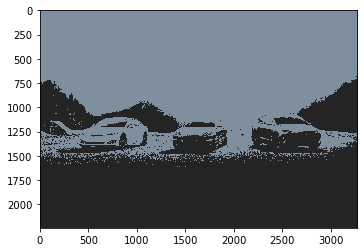

In [12]:
image = cv2.imread("C://Users/subha/Desktop/Computer Vision/image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


#Prepare data for k-means

# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
# Convert to float type
pixel_vals = np.float32(pixel_vals)



#Implement k-means clustering

# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

#Perform k-means clustering
k = 2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

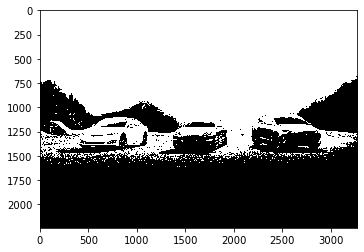

In [13]:
#Visualizing one segment to find which is the object ,background, etc!
plt.imshow(labels_reshape==0, cmap='gray')

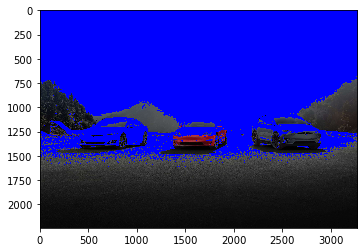

In [15]:
# mask an image segment by cluster
cluster = 0 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 0, 255]
plt.imshow(masked_image)